In [84]:
import pandas as pd
import statsmodels.formula.api as smf
from pandasql import sqldf
pandas_sql = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt

In [160]:
df = pd.read_csv('311_Noise_Complaints.csv')

In [161]:
df.shape

(3007302, 39)

In [162]:
df = df[df['Agency']=='DEP']

In [155]:
df.head(100)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,18992325,10/28/2010 03:49:51 AM,10/28/2010 04:48:59 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10001.0,330 WEST 30 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.750113,-73.996329,"(40.75011282688794, -73.99632947923503)"
1,18992327,10/28/2010 05:49:06 AM,10/28/2010 07:26:31 AM,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,11226.0,21 EAST 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.653812,-73.960648,"(40.65381155208612, -73.96064841248572)"
2,18992356,10/28/2010 03:14:25 AM,10/28/2010 04:35:51 AM,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,11203.0,647 ALBANY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.658414,-73.939565,"(40.658413639287105, -73.93956470644126)"
3,18992357,10/28/2010 02:48:46 AM,10/28/2010 04:02:37 AM,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,11229.0,EAST 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.609952,-73.952362,"(40.60995218422463, -73.9523618012688)"
4,18992358,10/28/2010 02:55:49 AM,10/28/2010 03:14:08 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11203.0,CHURCH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.652460,-73.925356,"(40.65246009833145, -73.92535638415544)"
5,18992368,10/28/2010 07:04:37 AM,10/28/2010 07:29:33 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11374.0,65-36 WETHEROLE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.726309,-73.859011,"(40.726309163635, -73.85901136883592)"
6,18992392,10/28/2010 11:38:35 AM,10/28/2010 02:16:55 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10011.0,348 WEST 18 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.742837,-74.002108,"(40.74283653632738, -74.0021075221416)"
7,19036566,11/03/2010 09:34:49 PM,11/03/2010 11:07:47 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10013.0,163 VARICK STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.726799,-74.005610,"(40.72679882391691, -74.00561028808686)"
8,18992415,10/28/2010 05:16:46 AM,10/28/2010 07:24:29 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11385.0,412 SENECA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.706607,-73.914125,"(40.7066066636566, -73.91412546027345)"
9,18992416,10/28/2010 05:44:48 AM,10/28/2010 06:35:31 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11229.0,2330 OCEAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.604940,-73.952473,"(40.6049402333834, -73.95247341700663)"


In [168]:
df['Created Date'] = pd.to_datetime(df['Created Date'], format='%m/%d/%Y %I:%M:%S %p')

In [169]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'], format='%m/%d/%Y %I:%M:%S %p')

In [170]:
df['Hours to Resolution'] = (df['Closed Date'] - df['Created Date']).astype('timedelta64[h]')

In [171]:
df.head(100)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Created Date2,Hours to Resolution
33,29095812,2014-10-18 01:43:00,2014-10-24 21:00:00,DEP,Department of Environmental Protection,Noise,Noise: Manufacturing Noise (NK1),NaN,10003.0,123 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.728217,-73.987957,"(40.72821736979055, -73.98795656570829)",2014-10-18 01:43:00,163.0
474,21902947,2011-11-16 20:03:00,2011-11-24 00:45:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-11-16 20:03:00,172.0
475,18998704,2010-10-28 16:49:00,NaT,DEP,Department of Environmental Protection,Noise,Noise: Private Carting Noise (NQ1),NaN,10022.0,400 EAST 60 STREET,...,NaN,NaN,NaN,NaN,NaN,40.760083,-73.961188,"(40.76008349803125, -73.96118844810793)",2010-10-28 16:49:00,NaN
814,29108954,2014-10-20 08:35:00,2014-10-21 10:34:00,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11379.0,61-53 77 STREET,...,NaN,NaN,NaN,NaN,NaN,40.722519,-73.881636,"(40.72251942744052, -73.88163589814498)",2014-10-20 08:35:00,25.0
1143,37360234,2017-10-05 06:50:00,2017-10-13 09:06:00,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,11358.0,36-15 166 STREET,...,NaN,NaN,NaN,NaN,NaN,40.762735,-73.799881,"(40.762735078783415, -73.7998806305407)",2017-10-05 06:50:00,194.0
1147,21942828,2011-11-22 07:38:00,2012-01-30 12:45:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11238.0,209 PROSPECT PLACE,...,NaN,NaN,NaN,NaN,NaN,40.677875,-73.969831,"(40.6778750513499, -73.96983122103994)",2011-11-22 07:38:00,1661.0
1148,21942833,2011-11-22 04:54:00,2012-01-27 09:45:00,DEP,Department of Environmental Protection,Noise,Noise: Jack Hammering (NC2),NaN,11201.0,236 LIVINGSTON STREET,...,NaN,NaN,NaN,NaN,NaN,40.689153,-73.984534,"(40.68915349074286, -73.98453444341065)",2011-11-22 04:54:00,1588.0
1149,37360350,2017-10-05 22:50:00,2017-10-20 20:02:00,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,10453.0,1963 GRAND CONCOURSE,...,NaN,NaN,NaN,NaN,NaN,40.850720,-73.904993,"(40.85072013584082, -73.90499320625935)",2017-10-05 22:50:00,357.0
1150,19050873,2010-11-04 15:45:00,NaT,DEP,Department of Environmental Protection,Noise,Noise: Private Carting Noise (NQ1),NaN,11201.0,18 COLUMBIA PLACE,...,NaN,NaN,NaN,NaN,NaN,40.693222,-73.998568,"(40.69322226930622, -73.99856838409563)",2010-11-04 15:45:00,NaN
1151,19050891,2010-11-04 15:53:00,NaT,DEP,Department of Environmental Protection,Noise,Noise: Private Carting Noise (NQ1),NaN,10463.0,666 KAPPOCK STREET,...,NaN,NaN,NaN,NaN,NaN,40.879623,-73.916871,"(40.879622742157515, -73.91687089112715)",2010-11-04 15:53:00,NaN


In [172]:
# Only resolved complaints where closed date is after created date
df = df[df['Hours to Resolution']>=0]

In [173]:
df['Weekday'] = df['Created Date'].dt.day_name()

In [175]:
df['Weekday Num'] = df['Created Date'].dt.weekday

In [176]:
df['Creation Hour'] = df['Created Date'].dt.hour

In [177]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Created Date2,Hours to Resolution,Weekday,Weekday Num,Creation Hour
33,29095812,2014-10-18 01:43:00,2014-10-24 21:00:00,DEP,Department of Environmental Protection,Noise,Noise: Manufacturing Noise (NK1),NaN,10003.0,123 2 AVENUE,...,NaN,NaN,40.728217,-73.987957,"(40.72821736979055, -73.98795656570829)",2014-10-18 01:43:00,163.0,Saturday,5,1
474,21902947,2011-11-16 20:03:00,2011-11-24 00:45:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2011-11-16 20:03:00,172.0,Wednesday,2,20
814,29108954,2014-10-20 08:35:00,2014-10-21 10:34:00,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11379.0,61-53 77 STREET,...,NaN,NaN,40.722519,-73.881636,"(40.72251942744052, -73.88163589814498)",2014-10-20 08:35:00,25.0,Monday,0,8
1143,37360234,2017-10-05 06:50:00,2017-10-13 09:06:00,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,11358.0,36-15 166 STREET,...,NaN,NaN,40.762735,-73.799881,"(40.762735078783415, -73.7998806305407)",2017-10-05 06:50:00,194.0,Thursday,3,6
1147,21942828,2011-11-22 07:38:00,2012-01-30 12:45:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11238.0,209 PROSPECT PLACE,...,NaN,NaN,40.677875,-73.969831,"(40.6778750513499, -73.96983122103994)",2011-11-22 07:38:00,1661.0,Tuesday,1,7


In [178]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [179]:
df.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'facility_type', 'status', 'due_date',
       'resolution_description', 'resolution_action_updated_date',
       'community_board', 'borough', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'park_facility_name', 'park_borough',
       'vehicle_type', 'taxi_company_borough', 'taxi_pick_up_location',
       'bridge_highway_name', 'bridge_highway_direction', 'road_ramp',
       'bridge_highway_segment', 'latitude', 'longitude', 'location',
       'created_date2', 'hours_to_resolution', 'weekday', 'weekday_num',
       'creation_hour'],
      dtype='object')

In [197]:
df['created_month'] = df['created_date'].dt.month

In [198]:
df['created_month_name'] = df['created_date'].dt.month_name()

In [182]:
lm = smf.ols(formula='hours_to_resolution~weekday+created_month+creation_hour', data = df).fit()
print(lm.summary())

                             OLS Regression Results                            
Dep. Variable:     hours_to_resolution   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     154.2
Date:                 Fri, 29 Mar 2019   Prob (F-statistic):          1.63e-228
Time:                         13:22:25   Log-Likelihood:            -3.1460e+06
No. Observations:               430958   AIC:                         6.292e+06
Df Residuals:                   430950   BIC:                         6.292e+06
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             

In [183]:
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bridge_highway_segment,latitude,longitude,location,created_date2,hours_to_resolution,weekday,weekday_num,creation_hour,created_month
33,29095812,2014-10-18 01:43:00,2014-10-24 21:00:00,DEP,Department of Environmental Protection,Noise,Noise: Manufacturing Noise (NK1),NaN,10003.0,123 2 AVENUE,...,NaN,40.728217,-73.987957,"(40.72821736979055, -73.98795656570829)",2014-10-18 01:43:00,163.0,Saturday,5,1,<pandas.core.indexes.accessors.DatetimePropert...
474,21902947,2011-11-16 20:03:00,2011-11-24 00:45:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2011-11-16 20:03:00,172.0,Wednesday,2,20,<pandas.core.indexes.accessors.DatetimePropert...
814,29108954,2014-10-20 08:35:00,2014-10-21 10:34:00,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11379.0,61-53 77 STREET,...,NaN,40.722519,-73.881636,"(40.72251942744052, -73.88163589814498)",2014-10-20 08:35:00,25.0,Monday,0,8,<pandas.core.indexes.accessors.DatetimePropert...
1143,37360234,2017-10-05 06:50:00,2017-10-13 09:06:00,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,11358.0,36-15 166 STREET,...,NaN,40.762735,-73.799881,"(40.762735078783415, -73.7998806305407)",2017-10-05 06:50:00,194.0,Thursday,3,6,<pandas.core.indexes.accessors.DatetimePropert...
1147,21942828,2011-11-22 07:38:00,2012-01-30 12:45:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11238.0,209 PROSPECT PLACE,...,NaN,40.677875,-73.969831,"(40.6778750513499, -73.96983122103994)",2011-11-22 07:38:00,1661.0,Tuesday,1,7,<pandas.core.indexes.accessors.DatetimePropert...


In [184]:
df[['hours_to_resolution', 'weekday_num']].groupby('weekday_num').mean()

,hours_to_resolution
weekday_num,
0,116.502317
1,120.653187
2,129.224250
3,140.651829
4,153.929274
5,168.990859
6,145.338805


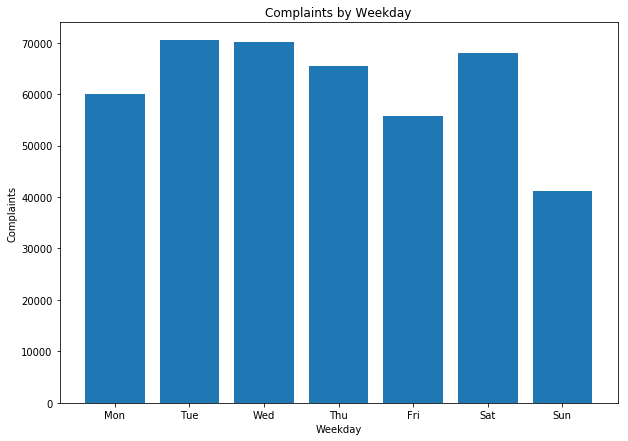

In [237]:
gb = df[['hours_to_resolution', 'weekday_num']].groupby('weekday_num').count()
plt.figure(figsize=[10,7])
plt.bar(x=gb.index,
        height=gb['hours_to_resolution'],
       tick_label=True)
plt.xlabel('Weekday')
plt.ylabel('Complaints')
plt.xticks(range(7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Complaints by Weekday')
plt.show()

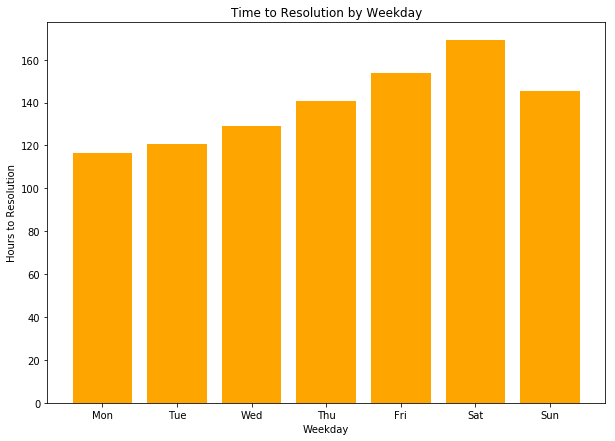

In [238]:
plt.figure(figsize=[10,7])
plt.bar(x=df[['hours_to_resolution', 'weekday_num']].groupby('weekday_num').mean().index,
        height=df[['hours_to_resolution', 'weekday_num']].groupby('weekday_num').mean()['hours_to_resolution'],
       tick_label=True,
       color='orange')
plt.xlabel('Weekday')
plt.ylabel('Hours to Resolution')
plt.xticks(range(7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Time to Resolution by Weekday')
plt.show()

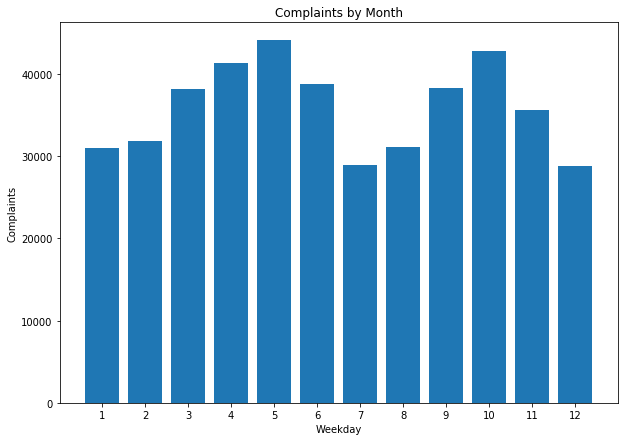

In [239]:
gb = df[['hours_to_resolution', 'created_month']].groupby('created_month').count()
plt.figure(figsize=[10,7])
plt.bar(x=gb.index,
        height=gb['hours_to_resolution'],
       tick_label=True)
plt.xlabel('Weekday')
plt.ylabel('Complaints')
plt.xticks(range(1,13),range(1,13))
plt.title('Complaints by Month')
plt.show()

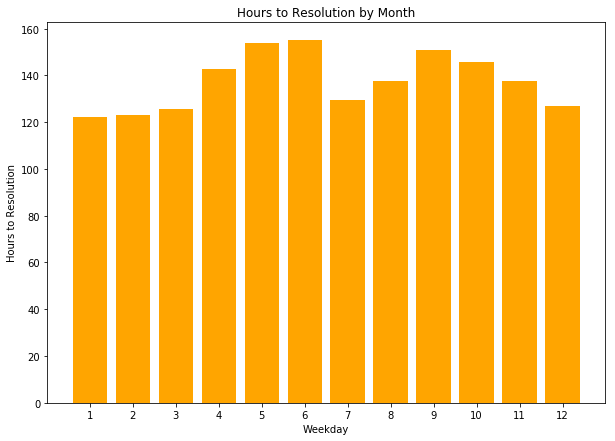

In [240]:
gb = df[['hours_to_resolution', 'created_month']].groupby('created_month').mean()
plt.figure(figsize=[10,7])
plt.bar(x=gb.index,
        height=gb['hours_to_resolution'],
       tick_label=True,
       color='orange')
plt.xlabel('Weekday')
plt.ylabel('Hours to Resolution')
plt.xticks(range(1,13),range(1,13))
plt.title('Hours to Resolution by Month')
plt.show()

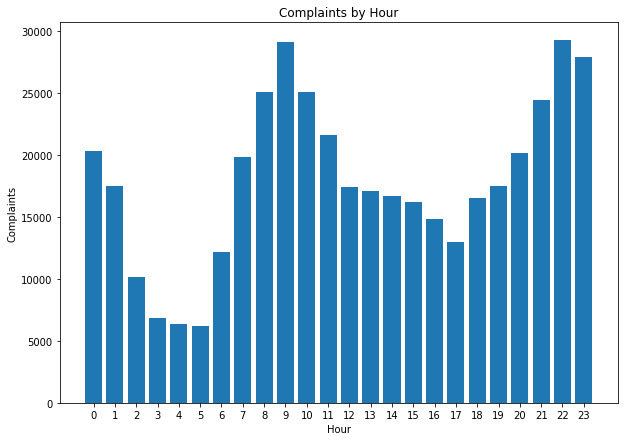

In [242]:
gb = df[['hours_to_resolution', 'creation_hour']].groupby('creation_hour').count()
plt.figure(figsize=[10,7])
plt.bar(x=gb.index,
        height=gb['hours_to_resolution'],
       tick_label=True)
plt.xlabel('Hour')
plt.ylabel('Complaints')
plt.xticks(range(0,24),range(0,24))
plt.title('Complaints by Hour')
plt.show()

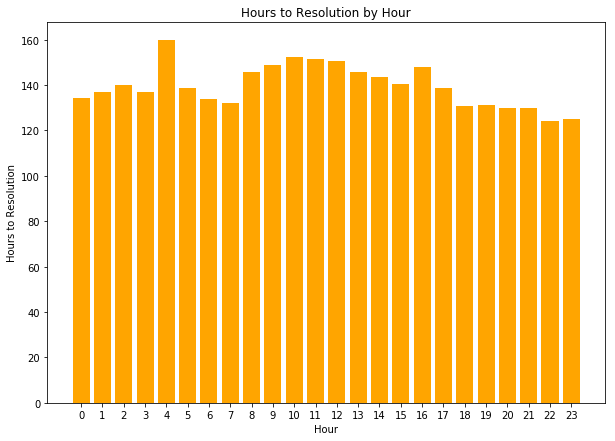

In [243]:
gb = df[['hours_to_resolution', 'creation_hour']].groupby('creation_hour').mean()
plt.figure(figsize=[10,7])
plt.bar(x=gb.index,
        height=gb['hours_to_resolution'],
       tick_label=True,
       color='orange')
plt.xlabel('Hour')
plt.ylabel('Hours to Resolution')
plt.xticks(range(0,24),range(0,24))
plt.title('Hours to Resolution by Hour')
plt.show()